


#                                **LeNet MNIST**

CNN est essentiellement un modèle connu pour être un réseau de neurones convolutifs et, ces derniers temps, il a gagné en popularité en raison de son utilité. CNN utilise des perceptrons multicouches pour effectuer des travaux de calcul. CNN utilise relativement peu de prétraitement par rapport aux autres algorithmes de classification d'images. Cela signifie que le réseau apprend à travers des filtres qui, dans les algorithmes traditionnels, ont été conçus à la main. Ainsi, pour les tâches de traitement d'image, les CNN sont l'option la mieux adaptée.

 

In [ ]:
# charger  minit data
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


On commence par charger le data minit
et afficher une seule image en nivau de gris

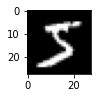

In [ ]:
# plot 
import matplotlib.pyplot as plt

plt.subplot(321)
plt.imshow(x_train[0],cmap=plt.get_cmap('gray'))

Ensuite, on reshape pour avoir 28 * 28, les données test et les données train

In [ ]:
# redimentionner [samples][width][height][pixels]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

Ensuite on passe à la normalisation en divisant sur 255

In [ ]:
# normalisation
x_train = x_train / 255.0
x_test = x_test / 255.0

On utilise la méthode to_categoricalqui permet , un tableau numpy (ou) un vecteur qui a des entiers qui représentent différentes catégories, d'être converti en un tableau numpy (ou) une matrice qui a des valeurs binaires et a des colonnes égales au nombre de catégories dans le Les données.
Étant donné que la sortie du modèle peut comprendre n'importe lequel des chiffres compris entre 0 et 9. nous avons donc besoin de 10 classes en sortie. Pour créer une sortie pour 10 classes, on utilise cette fonction, qui fournira les 10 colonnes. Sur ces 10 colonnes, une seule valeur sera un et les 9 autres seront zéro et cette seule valeur de la sortie dénotera la classe du chiffre.

In [ ]:
import numpy as np
from keras.utils import np_utils

# to_categorical
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# parameters
EPOCHS = 10
INIT_LR = 1e-3
BS = 32
CLASS_NUM = 10
norm_size = 28

Importation des bibliothèques nécessaires pour notre model 


In [ ]:
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from keras.models import load_model

On commence par définir notre model sequential (est approprié pour une pile simple de couches où chaque couche a exactement un tenseur d'entrée et un tenseur de sortie), ce qui appreprié à notre cas.


In [ ]:
# définir le model NET
def l_model(width, height, depth, NB_CLASS):
    model = Sequential()
    inputShape = (height, width, depth)
    # si nous utilisons "channels last", mettez à jour la forme d'entrée
    if K.image_data_format() == "channels_first": 
        inputShape = (depth, height, width)
    # premier ensemble de couches CONV => RELU => POOL                  
    model.add(Conv2D(6, (5, 5), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # deuxième ensemble de couches CONV => RELU => POOL                  
    model.add(Conv2D(16, (5, 5), padding="valid"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # premier ensemble de couches FC => RELU                             
    model.add(Flatten())
    model.add(Dense(120))
    model.add(Activation("relu"))
    # 2 ème ensemble de couches FC => RELU                              
    model.add(Flatten())
    model.add(Dense(84))
    model.add(Activation("relu"))
    # 3 ème ensemble de couches FC => RELU                              
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation("relu"))

    # softmax classifieur                                              
    model.add(Dense(NB_CLASS))
    model.add(Activation("softmax"))

    # renvoie l'architecture du réseau construite
    return model


In [ ]:
# affichage des caracteristiques du model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_1 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0

1- la couche Conv2d qui convolue l'image à l'aide de 6 filtres de taille chacun (5 X 5). 

2 -  une autre couche Conv2D qui est également utilisée pour convoluer l'image et utilise 16 filtres de taille chacun (5 X 5). 

3-  la couche MaxPooling2D qui sélectionne la valeur maximale d'une matrice de taille (2 X 2). 

4 - (model.add(Flatten()) : aplatit la sortie obtenue, et cette sortie aplatie est transmise au niveau suivant. 

5 -  une couche cachée d'un réseau de neurones contenant 120 neurones.

6 -  une couche cachée d'un réseau de neurones contenant 84 neurones.

7 -  une couche cachée d'un réseau de neurones contenant 10 neurones. 

8 - la couche de sortie ayant 10 classes de sortie qui utilise la fonction softmax.

Dans la suite on fait appel à compile et fit:

In [ ]:
model = l_model(width=norm_size, height=norm_size, depth=1, NB_CLASS=CLASS_NUM)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# traning
H = model.fit(x_train, y_train, batch_size=BS, epochs=EPOCHS,validation_data=(x_test, y_test), verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
1875/1875 [==============================] - 40s 5ms/step - loss: 0.2224 - accuracy: 0.9293 - val_loss: 0.0579 - val_accuracy: 0.9829
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0627 - accuracy: 0.9809 - val_loss: 0.0413 - val_accuracy: 0.9868
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0431 - accuracy: 0.9867 - val_loss: 0.0464 - val_accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0323 - accuracy: 0.9900 - val_loss: 0.0271 - val_accuracy: 0.9908
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0249 - accuracy: 0.9918 - val_loss: 0.0289 - val_accuracy: 0.9906
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0191 - accuracy: 0.9942 - val_loss: 0.0312 - val_accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.0295 - val_accura

313/313 [==============================] - 1s 4ms/step - loss: 0.0315 - accuracy: 0.9911


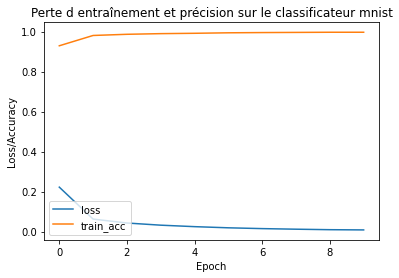

In [ ]:
# le processus d'itération
N = EPOCHS
plt.figure()
plt.plot(np.arange(0,N),H.history['loss'],label='loss')
plt.plot(np.arange(0,N),H.history['accuracy'],label='train_acc')
plt.title('Perte d entraînement et précision sur le classificateur mnist')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
#  Calcul de la perte et de la précision
# train
tr_loss, tr_accurary = model.evaluate(x_train, y_train)
# test
te_loss, te_accurary = model.evaluate(x_test, y_test)

Enfin on arrive à voir les résultats suivant:

Text(0.5, 1.0, 'lrate=0.001')

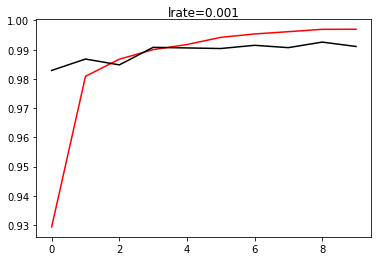

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
pyplot.plot(H.history['accuracy'], label ='train', color = 'red')
pyplot.plot(H.history['val_accuracy'], label ='test', color = 'black')
pyplot.title('lrate='+str(INIT_LR), pad = -50)

# II) - MNIST Noisy

In [ ]:
import scipy.io as sio
# charger les données
mnistawgn = scipy.io.loadmat('mnist-with-awgn.mat')

In [ ]:
train_x = mnistawgn['train_x']
train_y = mnistawgn['train_y']
test_x = mnistawgn['test_x']
test_y = mnistawgn['test_y']

In [ ]:
# redimentionner 
train_x = train_x.reshape(60000,28,28,1)
test_x = test_x.reshape(10000,28,28,1)

In [ ]:
# normalisation
train_x = train_x / 255.0
test_x = test_x / 255.0

In [ ]:
import numpy as np
from keras.utils import np_utils

# parameters
EPOCHS = 10
INIT_LR = 1e-3
BS = 32
CLASS_NUM = 10
norm_size = 28

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from keras.models import load_model

In [ ]:
# définir le model NET
def l_model(width, height, depth, NB_CLASS):
    model = Sequential()
    inputShape = (height, width, depth)
    # si nous utilisons "channels last", mettez à jour la forme d'entrée
    if K.image_data_format() == "channels_first": 
        inputShape = (depth, height, width)
    # premier ensemble de couches CONV => RELU => POOL                  
    model.add(Conv2D(6, (5, 5), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # deuxième ensemble de couches CONV => RELU => POOL                  
    model.add(Conv2D(16, (5, 5), padding="valid"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # premier ensemble de couches FC => RELU                             
    model.add(Flatten())
    model.add(Dense(120))
    model.add(Activation("relu"))
    # 2 ème ensemble de couches FC => RELU                              
    model.add(Flatten())
    model.add(Dense(84))
    model.add(Activation("relu"))
    # 3 ème ensemble de couches FC => RELU                              
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation("relu"))

    # softmax classifieur                                              
    model.add(Dense(NB_CLASS))
    model.add(Activation("softmax"))

    # renvoie l'architecture du réseau construite
    return model

In [ ]:
model = l_model(width=norm_size, height=norm_size, depth=1, NB_CLASS=CLASS_NUM)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
#sgd = optimizers.SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# traning
H = model.fit(train_x, train_y, batch_size=BS, epochs=EPOCHS,validation_data=(test_x, test_y), verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3402 - accuracy: 0.8887 - val_loss: 0.1132 - val_accuracy: 0.9618
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1032 - accuracy: 0.9679 - val_loss: 0.0869 - val_accuracy: 0.9718
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0733 - accuracy: 0.9774 - val_loss: 0.0727 - val_accuracy: 0.9778
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0575 - accuracy: 0.9818 - val_loss: 0.0635 - val_accuracy: 0.9809
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0457 - accuracy: 0.9854 - val_loss: 0.0565 - val_accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.0583 - val_accuracy: 0.9830
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0295 - accuracy: 0.9903 - val_loss: 0.0602 - val_ac

Text(0.5, 1.0, 'lrate=0.001')

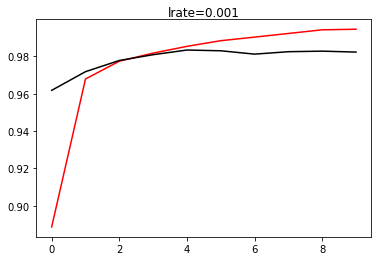

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
pyplot.plot(H.history['accuracy'], label ='train', color = 'red')
pyplot.plot(H.history['val_accuracy'], label ='test', color = 'black')
pyplot.title('lrate='+str(INIT_LR), pad = -50)

313/313 [==============================] - 1s 4ms/step - loss: 0.0670 - accuracy: 0.9823


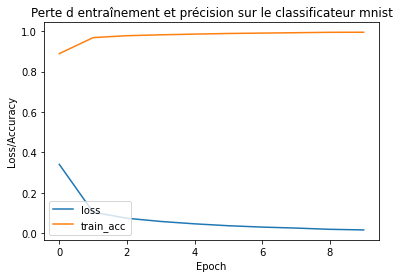

In [ ]:
# le processus d'itération
N = EPOCHS
plt.figure()
plt.plot(np.arange(0,N),H.history['loss'],label='loss')
plt.plot(np.arange(0,N),H.history['accuracy'],label='train_acc')
plt.title('Perte d entraînement et précision sur le classificateur mnist')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
#  Calcul de la perte et de la précision
# train
tr_loss, tr_accurary = model.evaluate(train_x, train_y)
# test
te_loss, te_accurary = model.evaluate(test_x, test_y)

In [ ]:
# on utilise SGD comme optimizer cette fois pour comparer les resultats

model = l_model(width=norm_size, height=norm_size, depth=1, NB_CLASS=CLASS_NUM)
#opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
sgd = optimizers.SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

# traning
H = model.fit(train_x, train_y, batch_size=BS, epochs=EPOCHS,validation_data=(test_x, test_y), verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.9995 - accuracy: 0.6611 - val_loss: 0.2857 - val_accuracy: 0.9116
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2310 - accuracy: 0.9291 - val_loss: 0.1717 - val_accuracy: 0.9461
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1705 - accuracy: 0.9475 - val_loss: 0.1503 - val_accuracy: 0.9545
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1424 - accuracy: 0.9565 - val_loss: 0.1174 - val_accuracy: 0.9634
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1261 - accuracy: 0.9611 - val_loss: 0.1186 - val_accuracy: 0.9616
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1134 - accuracy: 0.9646 - val_loss: 0.1045 - val_accuracy: 0.9656
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1041 - accuracy: 0.9683 - val_loss: 0.0965 - val_ac

Text(0.5, 1.0, 'lrate=0.001')

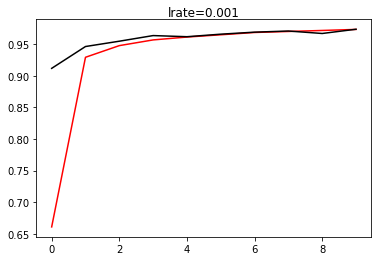

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
pyplot.plot(H.history['accuracy'], label ='train', color = 'red')
pyplot.plot(H.history['val_accuracy'], label ='test', color = 'black')
pyplot.title('lrate='+str(INIT_LR), pad = -50)

313/313 [==============================] - 1s 4ms/step - loss: 0.0855 - accuracy: 0.9734


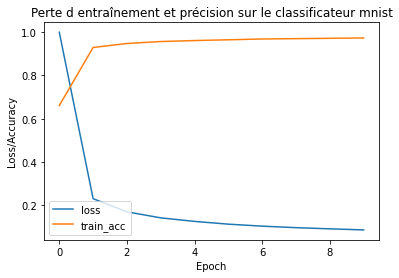

In [ ]:
# le processus d'itération
N = EPOCHS
plt.figure()
plt.plot(np.arange(0,N),H.history['loss'],label='loss')
plt.plot(np.arange(0,N),H.history['accuracy'],label='train_acc')
plt.title('Perte d entraînement et précision sur le classificateur mnist')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
#  Calcul de la perte et de la précision
# train
tr_loss, tr_accurary = model.evaluate(train_x, train_y)
# test
te_loss, te_accurary = model.evaluate(test_x, test_y)